In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/content/desaster tweets.csv")

In [4]:
df.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


Data understand

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB


In [6]:
df["keyword"].value_counts()

thunderstorm     93
flattened        88
mass%20murder    86
stretcher        86
drown            83
                 ..
electrocuted     16
rainstorm        11
siren            10
deluged          10
tsunami           6
Name: keyword, Length: 219, dtype: int64

In [7]:
df["location"].unique()

array([nan, 'New York City', 'Morgantown, WV', ...,
       'Blue State in a red sea', 'arohaonces', 'auroraborealis'],
      dtype=object)

In [8]:
df["location"].value_counts()

United States              96
Australia                  83
London, England            81
UK                         77
India                      74
                           ..
Great State of Texas        1
Karatina, Kenya             1
The internet or the gym     1
Reston, VA                  1
auroraborealis              1
Name: location, Length: 4504, dtype: int64

In [9]:
df["target"].value_counts()

0    9256
1    2114
Name: target, dtype: int64

In [6]:
df.isnull().sum()

id             0
keyword        0
location    3418
text           0
target         0
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()


0

In [29]:
df.dropna()

,id,keyword,location,text,target
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
5,5,ablaze,OC,"If this child was Chinese, this tweet would ha...",0
6,6,ablaze,"London, England",Several houses have been set ablaze in Ngemsib...,1
7,7,ablaze,Bharat,Asansol: A BJP office in Salanpur village was ...,1
...,...,...,...,...,...
11362,11362,wrecked,feuille d'érable,Stell wrecked ako palagi sayo. Haha. #ALABTopS...,0
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0


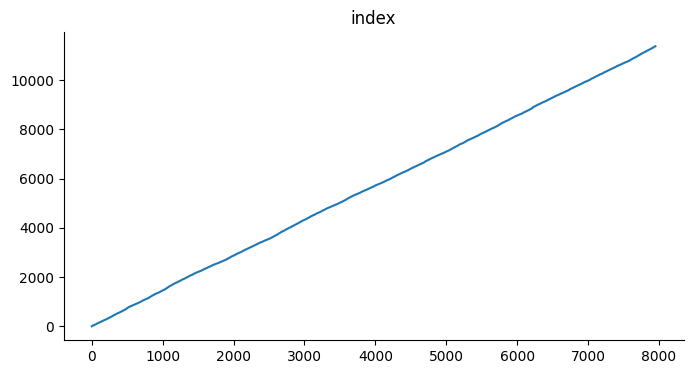

In [30]:
from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

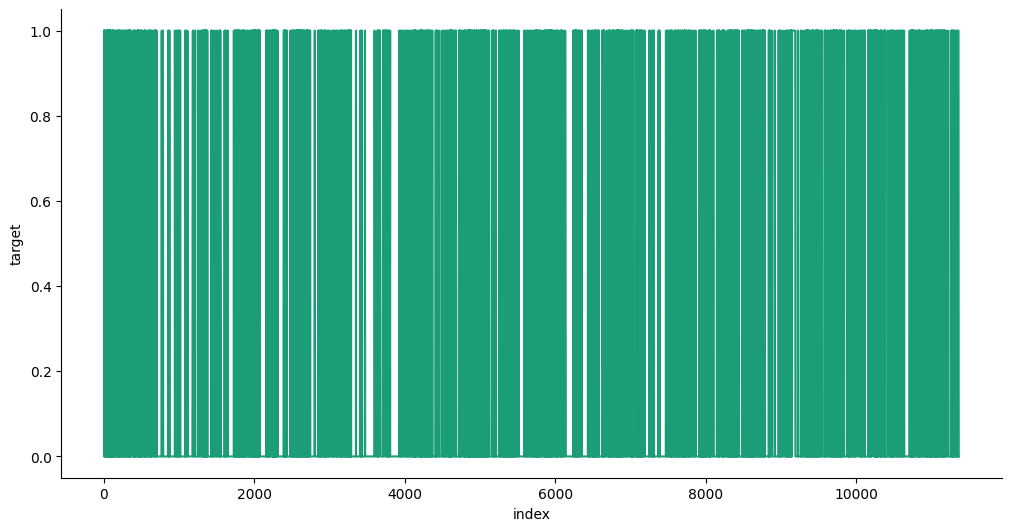

In [31]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['target']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('target')

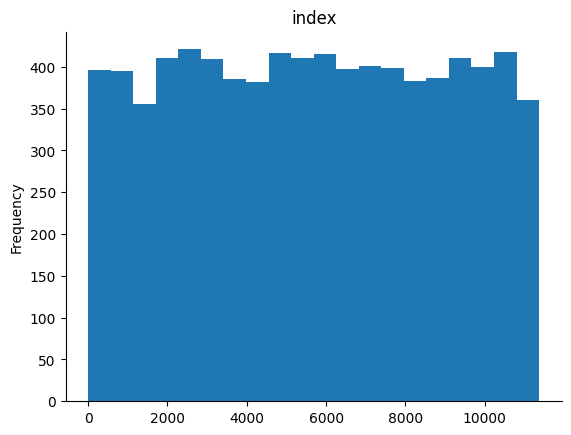

In [32]:
from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
df.isnull().sum()

id             0
keyword        0
location    3418
text           0
target         0
dtype: int64

In [11]:
df.shape

(11370, 5)

<Axes: >

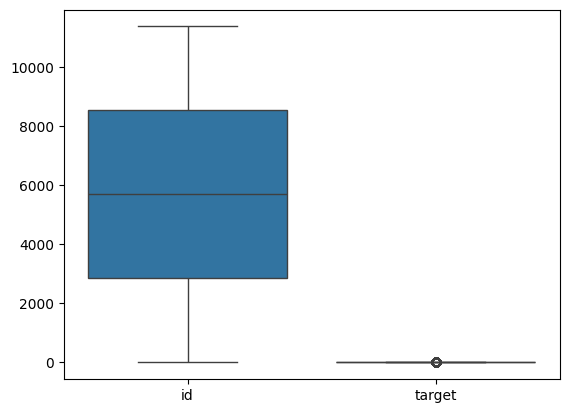

In [17]:
import seaborn as sns
sns.boxplot(df)

<Axes: xlabel='target', ylabel='count'>

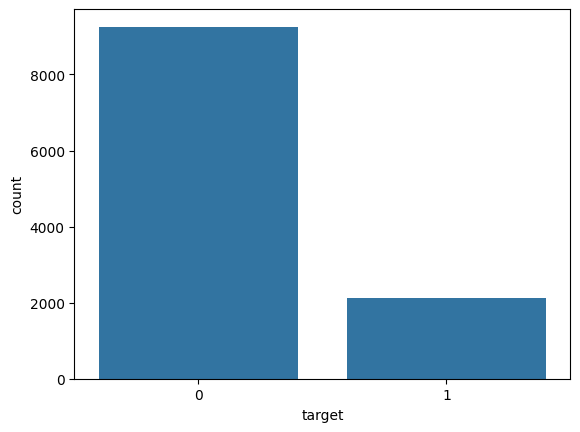

In [18]:
sns.countplot(x='target', data=df)

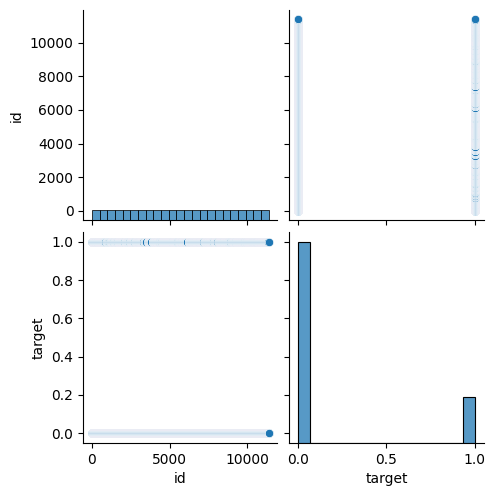

In [19]:
sns.pairplot(df)

In [34]:
df['length'] = df['text'].apply(len)

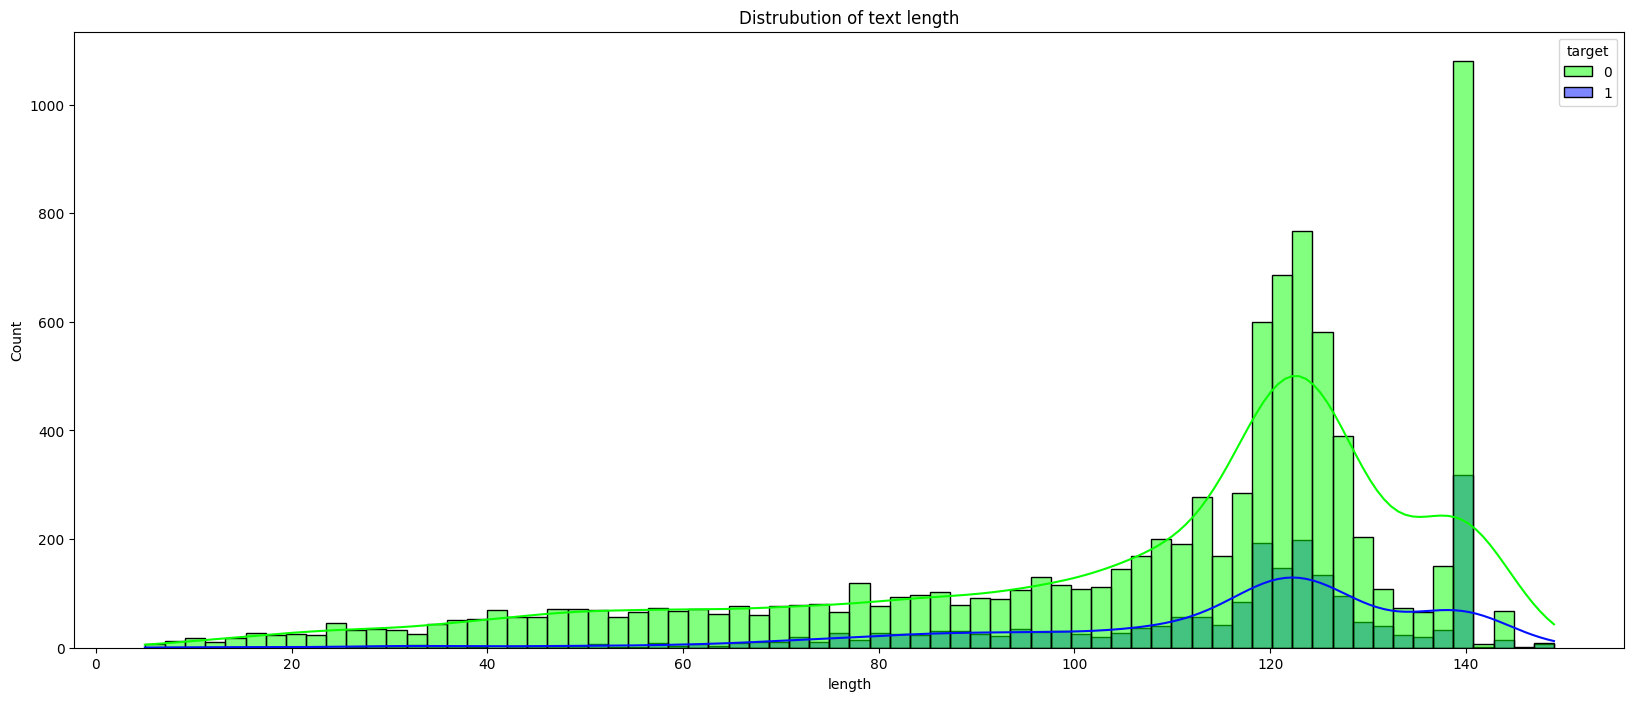

<Figure size 640x480 with 0 Axes>

In [35]:
plt.figure(figsize=(20,8))
sns.histplot(data=df,x='length',hue='target',palette='hsv',kde= True,bins=70)
plt.title('Distrubution of text length')
plt.show()
plt.tight_layout()

In [22]:
import plotly.figure_factory as ff
def avgwordlen(strlist):
    sum=[]
    for i in strlist:
        sum.append(len(i))
    return sum

avgword_len_dis = df[df['target']==1]['text'].str.split().apply(avgwordlen).map(lambda x: np.mean(x))

avgword_len_non_dis = df[df['target']==0]['text'].str.split().apply(avgwordlen).map(lambda x: np.mean(x))

group_labels = ['Disaster', 'Non-Disaster']
colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)']

fig = ff.create_distplot([avgword_len_dis, avgword_len_non_dis], group_labels, bin_size=.2, colors=colors,)

fig.update_layout(title_text="Average word length in tweets",title_x=0.5,xaxis_title="Text",yaxis_title="Density").show()


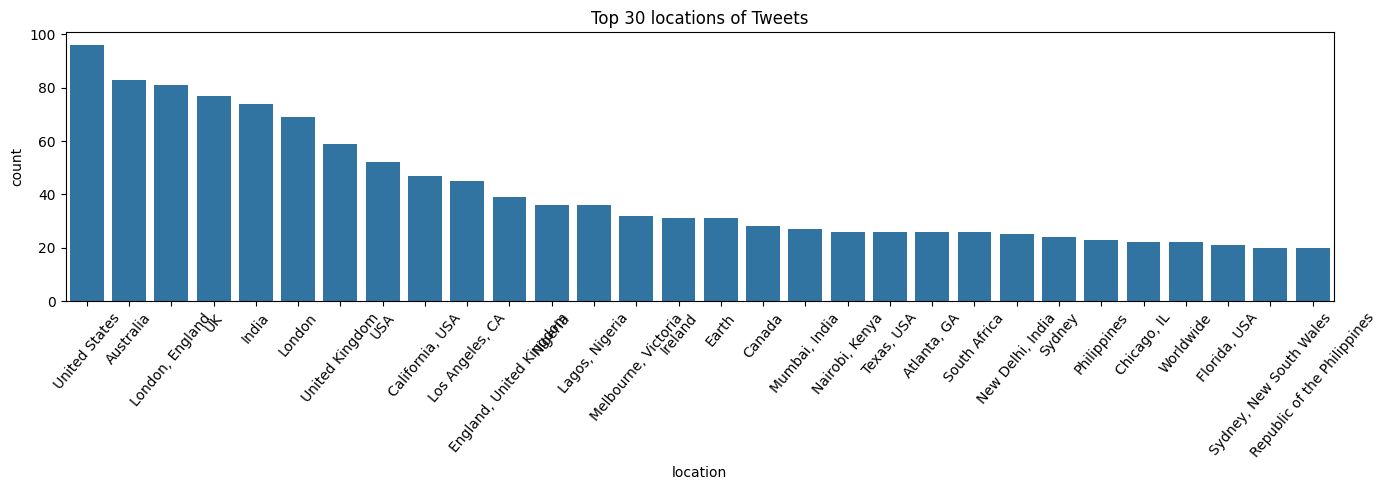

In [23]:
location = df.groupby('location')['target'].count()
df_loc = pd.DataFrame({'location':location.index,'count':location.values}).sort_values(by='count',ascending=False)

# Top 30 Location in the tweets
plt.figure(figsize=(14,5))
sns.barplot(data=df_loc.head(30),x='location',y='count')
plt.xticks(rotation = 50)
plt.title('Top 30 locations of Tweets')
plt.tight_layout()
plt.show()

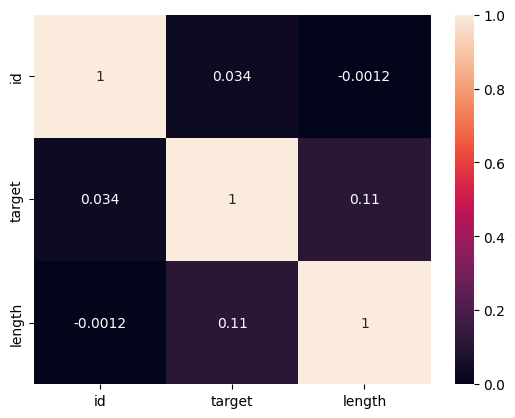

In [36]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)
plt.show()

In [12]:
!pip install nltk

In [13]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps=PorterStemmer()
import warnings
warnings.simplefilter("ignore")

In [15]:
corpus=[]

for i in range(len(df)):
    sp=re.sub("[^a-zA-Z]"," ",df["text"][i])
    sp=sp.lower()
    sp=sp.split()
    sp=[ps.stem(word) for word in sp if not word in set(stopwords.words("english"))]
    sp=" ".join(sp)
    corpus.append(sp)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(corpus).toarray()

In [17]:
y=df["target"]

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

# MultinomialNB

In [31]:

from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB(alpha=1)
model.fit(x_train,y_train)

MultinomialNB(alpha=1)

In [32]:
ypred_train=model.predict(x_train)

ypred_test=model.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score
print("Train_acc:",accuracy_score(y_train,ypred_train))
print("Test_acc:",accuracy_score(y_test,ypred_test))
from sklearn.model_selection import cross_val_score
print("CV_score:",cross_val_score(model,x_train,y_train,cv=5).mean())

Train_acc: 0.9488786279683378
Test_acc: 0.8663148636763413
CV_score: 0.8714815530813331


In [34]:
from sklearn.metrics import classification_report
classifier_report=classification_report(y_test,ypred_test)
print(classifier_report)


              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1828
           1       0.68      0.61      0.64       446

    accuracy                           0.87      2274
   macro avg       0.79      0.77      0.78      2274
weighted avg       0.86      0.87      0.86      2274



# HyperParameter Tuning

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
estimator=MultinomialNB()
param_grid={"alpha":list(range(1,10))}
model_g=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
model_g.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [36]:
model_g.best_params_

{'alpha': 1}

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

# Logistic Regression

In [ ]:
from  sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()
model_lr.fit(x_train_sc,y_train)

LogisticRegression()

In [ ]:
ypred_train=model_lr.predict(x_train_sc)
ypred_test=model_lr.predict(x_test_sc)

In [ ]:
from sklearn.metrics import accuracy_score
print("Train_acc:",accuracy_score(y_train,ypred_train))
print("Test_acc:",accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print("CV_score:",cross_val_score(model_lr,x_train_sc,y_train,cv=5,scoring="accuracy").mean())

Train_acc: 0.9997801231310466
Test_acc: 0.8614775725593667
CV_score: 0.8633461810317226


# RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=9)
model_rf.fit(x_train_sc,y_train)

RandomForestClassifier(n_estimators=9)

In [ ]:
#prediction
ypred_train=model_rf.predict(x_train_sc)
ypred_test=model_rf.predict(x_test_sc)

#Evaluation
from sklearn.metrics import accuracy_score
print("Train_acc:",accuracy_score(y_train,ypred_train))
print("Test_acc:",accuracy_score(y_test,ypred_test))

#Cross validation score
from sklearn.model_selection import cross_val_score
print("CV_score:",cross_val_score(model_rf,x_train_sc,y_train,cv=5,scoring="accuracy").mean())

Train_acc: 0.9898856640281443
Test_acc: 0.872471416007036
CV_score: 0.8653255924943665


In [ ]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

estimator=RandomForestClassifier()

param_grid={"n_estimators":list(range(10,20))}

model_r=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")

model_r.fit(x_train_sc,y_train)

In [ ]:
model_r.best_params_

{'n_estimators': 9}

# Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
model_dc=DecisionTreeClassifier(criterion="entropy",max_depth= 5)
model_dc.fit(x_train_sc,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [45]:
#prediction
ypred_train=model_dc.predict(x_train_sc)
ypred_test=model_dc.predict(x_test_sc)

In [46]:
#Evaluation
from sklearn.metrics import accuracy_score
print("Train_acc:",accuracy_score(y_train,ypred_train))
print("Test_acc:",accuracy_score(y_test,ypred_test))

#cross validation score
from sklearn.model_selection import cross_val_score
print("CV_score:",cross_val_score(model_dc,x_train_sc,y_train,cv=5,scoring="accuracy").mean())

Train_acc: 0.837401055408971
Test_acc: 0.8276165347405453
CV_score: 0.8338831866319497


In [42]:
from  sklearn.model_selection import GridSearchCV
estimator=DecisionTreeClassifier(random_state=5)
param_grid={"criterion":["gini","entropy"],"max_depth":[1,2,3,4,5]}
model_grd=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
model_grd.fit(x_train_sc,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [43]:
model_grd.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [27]:
from sklearn.metrics import classification_report
classifier_report=classification_report(y_test,ypred_test)
print(classifier_report)


              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1828
           1       0.72      0.21      0.32       446

    accuracy                           0.83      2274
   macro avg       0.78      0.59      0.61      2274
weighted avg       0.81      0.83      0.79      2274

